In [17]:
import numpy as np
import pandas as pd

In [18]:
#col_names = ["DestinationPort","FlowDuration","TotalFwdPackets","TotalBackwardPackets","TotalLengthofFwdPackets","TotalLengthofBwdPackets","FwdPacketLengthMax","FwdPacketLengthMin","FwdPacketLengthMean","FwdPacketLengthStd","BwdPacketLengthMax","BwdPacketLengthMin","BwdPacketLengthMean","BwdPacketLengthStd","FlowBytes/s","FlowPackets/s","FlowIATMean","FlowIATStd","FlowIATMax","FlowIATMin","FwdIATTotal","FwdIATMean","FwdIATStd","FwdIATMax","FwdIATMin","BwdIATTotal","BwdIATMean","BwdIATStd","BwdIATMax","BwdIATMin","FwdPSHFlags","BwdPSHFlags","FwdURGFlags","BwdURGFlags","FwdHeaderLength","BwdHeaderLength","FwdPackets/s","BwdPackets/s","MinPacketLength","MaxPacketLength","PacketLengthMean","PacketLengthStd","PacketLengthVariance","FINFlagCount","SYNFlagCount","RSTFlagCount","PSHFlagCount","ACKFlagCount","URGFlagCount","CWEFlagCount","ECEFlagCount","Down/UpRatio","AveragePacketSize","AvgFwdSegmentSize","AvgBwdSegmentSize","FwdHeaderLength","FwdAvgBytes/Bulk","FwdAvgPackets/Bulk","FwdAvgBulkRate","BwdAvgBytes/Bulk","BwdAvgPackets/Bulk","BwdAvgBulkRate","SubflowFwdPackets","SubflowFwdBytes","SubflowBwdPackets","SubflowBwdBytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd","min_seg_size_forward","ActiveMean","ActiveStd","ActiveMax","ActiveMin","IdleMean","IdleStd","IdleMax","IdleMin","Label"]
data = pd.read_csv('03-01-2018.csv', sep=",")#names=col_names)
data.head(3)

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign


In [19]:
print(data['Label'].value_counts(sort=1))

Benign           238037
Infilteration     93063
Label                25
Name: Label, dtype: int64


In [20]:
data.Label[data.Label == 'Benign'] = 1
data.Label[data.Label == 'Infilteration'] = 0
data['Label'].value_counts()

1        238037
0         93063
Label        25
Name: Label, dtype: int64

In [21]:
#data = data.apply(pd.to_numeric)
#data.iloc[21838]  
lis = []
lis = data[data['Dst Port']=='Dst Port'].index.values
print(lis)

[   413  19761  19906  39019  60809  76528  81059  85448  89953  91404
  92657  95060 331112 331113 331114 331115 331116 331117 331118 331119
 331120 331121 331122 331123 331124]


In [22]:
for i in lis:
    #print(data.loc[i, "Dst Port"], data.loc[i, "Protocol"])
    #if type(data.loc[i, "Dst Port"]) != int or type(data.loc[i, "Dst Port"]) != float:
    data=data.drop(i)

In [24]:
data.shape
#data = data.apply(pd.to_numeric)

(331100, 80)

In [37]:
def clean_dataset(data):
  assert isinstance (data, pd.DataFrame)
  data.dropna(inplace=True)
  indices_to_keep=~data.isin([np.nan, np.inf, -np.inf]).any(1)
  return data[indices_to_keep].astype(np.double)
#data = data.drop(labels=['Timestamp'], axis=1)
data = clean_dataset(data)

In [38]:
data = data.apply(pd.to_numeric)
print(data.select_dtypes(exclude='number').columns)

Index([], dtype='object')


In [39]:
#Y = data.iloc[:,78]
Y = data['Label']
print(Y)
#X = data.drop(data.columns[78],axis=1)
X = data.drop(labels=['Label'], axis=1)

#print(X)
print(X.shape)
print(Y.shape)

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
331107    1.0
331108    1.0
331109    1.0
331110    1.0
331111    1.0
Name: Label, Length: 328181, dtype: float64
(328181, 78)
(328181,)


In [40]:
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size= 0.3,random_state=20)
len(ytest)
K = math.sqrt(len(ytest))
K
if(K > 500):
    K = 99
if(int(K)%2 == 0):
    K = K-1

print(K,"The int version is", int(K))    

313.7753973784433 The int version is 313


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=int(K))
knn_model.fit(xtrain,ytrain)
knn_model.score(xtest,ytest)

0.7738052917576558

              precision    recall  f1-score   support

         0.0       0.88      0.22      0.35     27493
         1.0       0.77      0.99      0.86     70962

    accuracy                           0.77     98455
   macro avg       0.82      0.60      0.61     98455
weighted avg       0.80      0.77      0.72     98455



[[ 6033 21460]
 [  810 70152]]




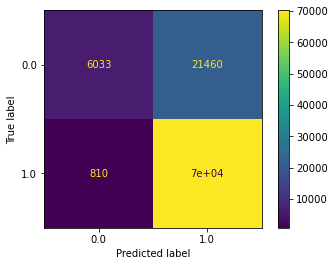

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
Pred = knn_model.predict(xtest)
print(classification_report(ytest,Pred))
plot_confusion_matrix(knn_model,xtest,ytest)
print("\n")
print(confusion_matrix(ytest,Pred))
print("\n")

C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\thobani_radebe\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


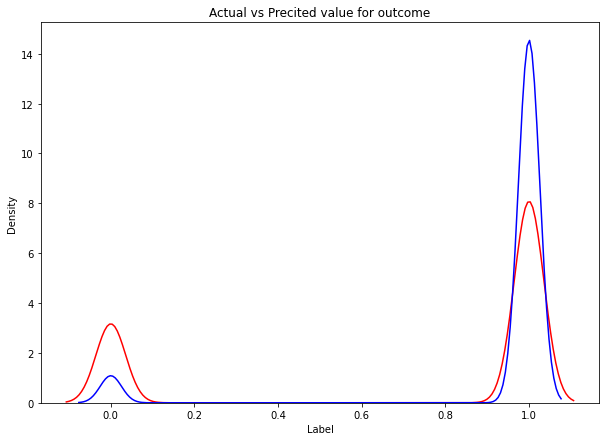

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
ax = sns.distplot(data.iloc[:,78], hist=False, color="r", label="Actual Value")
sns.distplot(Pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()